# Explore Exercises

In [1]:
import requests
import bs4
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import acquire as a 
import prepare as p
from env import get_db_url

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christophermayorga/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

Exercises
Do your work for this exercise in a file named explore.

1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [4]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()
print(df.shape)
df.head()

(5572, 2)


,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

**Explore Ham**

In [8]:
## creating panda's series that contain the frequency for ham spam and all words

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
## creating word count dataframe with ham spam and all columns

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


**n-grams**

***bi-gram: combination of two words***

***Represent text as combination of two words***

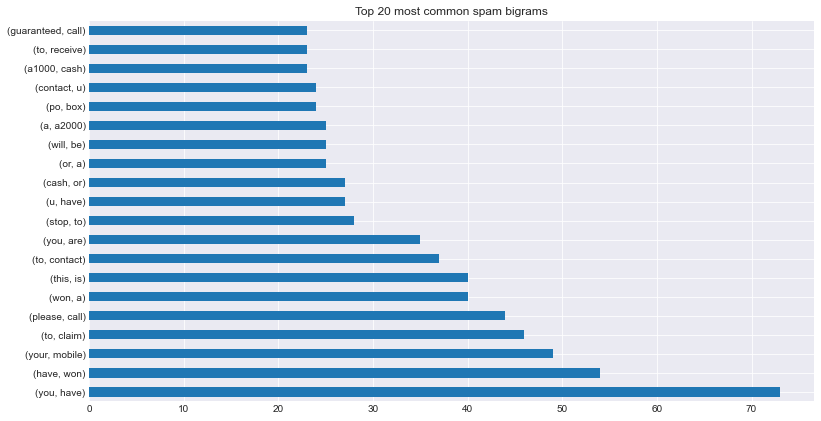

In [10]:
## creating bigrams for spam words and looking at the top 20 

pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 20 most common spam bigrams')
plt.show()

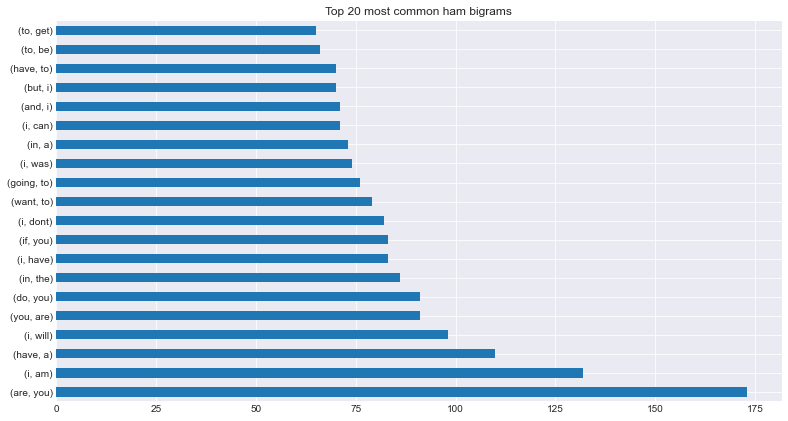

In [11]:
## creating bigrams for ham words and looking at the top 20

pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20).plot.barh()
plt.title('Top 20 most common ham bigrams')
plt.show()

**Bigram Bar Graph Takeaways**

The only overlap I can see from the spam bigrams and the ham bigrams are overlap between a common phrase.

For example the only overlap I see is the bigram 'you, are'

In [12]:
ham_words[:100] ## looking at first 100 characters in ham words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w'

In [13]:
## creating a series for the frequencies of the top 20 ham words

top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(20)

top_20_ham_bigrams.head()

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(you, are)     91
dtype: int64

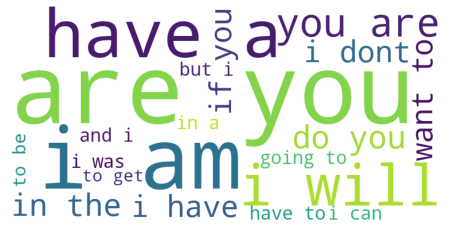

In [14]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
## creating a series for the frequencies of the top 20 spam words

top_20_spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(20)

top_20_spam_bigrams.head()

(you, have)       73
(have, won)       54
(your, mobile)    49
(to, claim)       46
(please, call)    44
dtype: int64

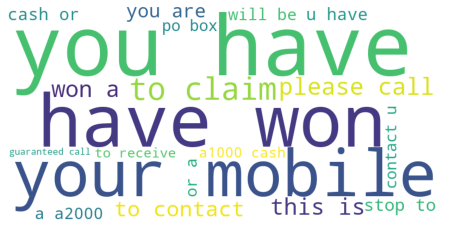

In [16]:
## using list comprehension to create a dictionary of spam bigrams as a dictionary

data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

**n-grams**

***tri-gram: combination of three words***

***Represent text as combination of two words***

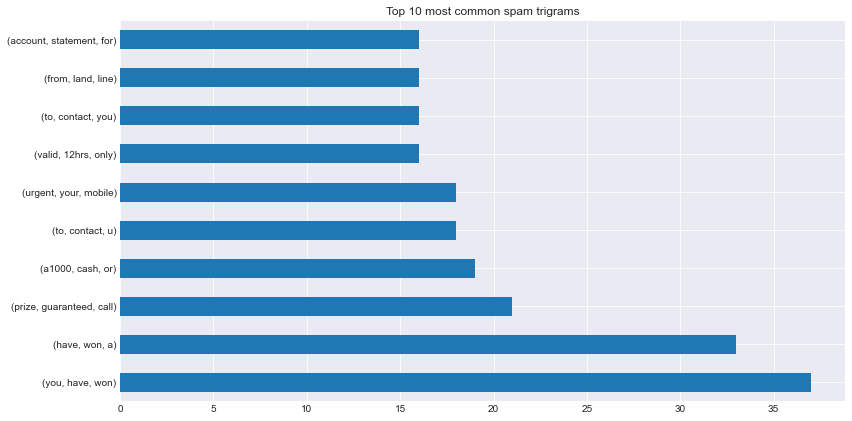

In [17]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')
plt.show()

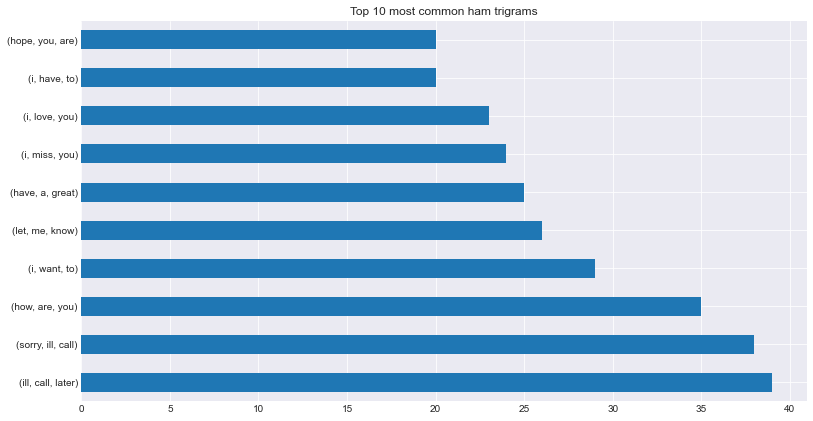

In [18]:
## creating trigrams for spam words and looking at the top 10 

pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')
plt.show()

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [19]:
## making our category list

category_list = ['business', 'technology', 'sports', 'entertainment']

In [20]:
blog_articles = a.get_all_news_articles(category_list) ## using our acquire function

blog_articles.head() ## previewing dataframe

/Users/christophermayorga/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py:106: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 106 of the file /Users/christophermayorga/Desktop/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


,title,content,category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman today anno...,business
1,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business
2,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business
3,"Apple, Alphabet, Microsoft post combined quart...",Three of the world's largest tech companies - ...,business
4,Banks to remain closed for a total of 15 days ...,The banks will remain closed for 15 days in Au...,business


In [21]:
## getting rid of whitespace and \n's
blog_articles['title'] = blog_articles['title'].str.strip() 

blog_articles.head() ## quality assurance check

,title,content,category
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman today anno...,business
1,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business
2,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business
3,"Apple, Alphabet, Microsoft post combined quart...",Three of the world's largest tech companies - ...,business
4,Banks to remain closed for a total of 15 days ...,The banks will remain closed for 15 days in Au...,business


In [22]:
blog_articles = p.prep_content_columns(blog_articles) ## using our prepare function

blog_articles.head()

,title,content,category,clean,stemmed,lemmatized
0,Customers of banks under moratorium to get ₹5 ...,Finance Minister Nirmala Sitharaman today anno...,business,finance minister nirmala sitharaman today anno...,financ minist nirmala sitharaman today announc...,Finance Minister Nirmala Sitharaman today anno...
1,Old video of people laughing as Bezos talks ab...,An old video of Amazon Founder Jeff Bezos has ...,business,an old video of amazon founder jeff bezos has ...,An old video of amazon founder jeff bezo ha go...,An old video of Amazon Founder Jeff Bezos ha g...
2,This information isn't collected by govt: FM o...,"Finance Minister Nirmala Sitharaman replied ""t...",business,finance minister nirmala sitharaman replied th...,"financ minist nirmala sitharaman repli ""thi in...","Finance Minister Nirmala Sitharaman replied ""t..."
3,"Apple, Alphabet, Microsoft post combined quart...",Three of the world's largest tech companies - ...,business,three of the world's largest tech companies a...,three of the world' largest tech compani - app...,Three of the world's largest tech company - Ap...
4,Banks to remain closed for a total of 15 days ...,The banks will remain closed for 15 days in Au...,business,the banks will remain closed for 15 days in au...,the bank will remain close for 15 day in augus...,The bank will remain closed for 15 day in Augu...


In [23]:
## looking at category value counts for the articles

blog_articles.category.value_counts()

sports           25
technology       24
entertainment    24
business         24
Name: category, dtype: int64

In [24]:
## making strings of all the words used for each category

entertain_words = ' '.join(blog_articles[blog_articles.category == 'entertainment'].clean)
business_words = ' '.join(blog_articles[blog_articles.category == 'business'].clean)
sports_words = ' '.join(blog_articles[blog_articles.category == 'sports'].clean)
technology_words = ' '.join(blog_articles[blog_articles.category == 'technology'].clean)
all_words = ' '.join(blog_articles.clean)

In [25]:
## making panda series that represent the frequencies of words used in each article 
## category

entertain_freq = pd.Series(entertain_words.split()).value_counts()
business_freq = pd.Series(business_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()
technology_freq = pd.Series(technology_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [26]:
## building our dataframe of word frequencies with our categories as columns

word_counts = pd.concat([entertain_freq, business_freq, 
                         sports_freq, technology_freq, all_freq], 
                        axis=1).fillna(0).astype(int)
word_counts.columns = ['entertainment', 'business', 'sports', 'tech', 'all']
word_counts.head()

,entertainment,business,sports,tech,all
the,58,55,65,56,234
and,31,29,20,31,111
to,30,49,32,43,154
in,29,32,41,28,130
he,28,12,10,8,58


In [27]:
## looking at the most frequently occuring words

word_counts.sort_values('all', ascending=False).head(20)

,entertainment,business,sports,tech,all
the,58,55,65,56,234
to,30,49,32,43,154
of,21,40,37,34,132
in,29,32,41,28,130
and,31,29,20,31,111
a,25,17,24,31,97
on,18,20,16,19,73
said,24,19,7,16,66
that,22,18,5,17,62
he,28,12,10,8,58


In [28]:
word_counts.sort_values(['sports', 'business'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
crore,0,19,0,0,19
its,1,11,0,5,17
companies,0,9,0,2,11
reported,0,6,0,1,7
billion,0,6,0,7,13
bank,0,6,0,2,8
around,0,6,0,5,11
aviation,0,6,0,0,6


In [29]:
word_counts.sort_values(['tech', 'entertainment'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
her,15,0,12,0,27
actor,13,0,0,0,13
actress,9,0,0,0,9
don't,7,0,0,0,7
film,6,0,0,0,6
porn,6,0,0,0,6
you,5,0,2,0,7
ali,5,0,0,0,5


In [30]:
word_counts.sort_values(['tech', 'business'], ascending=[True, False]).head(8)

,entertainment,business,sports,tech,all
crore,0,19,0,0,19
aviation,0,6,0,0,6
august,0,5,0,0,5
during,1,4,2,0,7
banks,0,4,0,0,4
international,0,4,0,0,4
capacity,0,4,0,0,4
ipo,0,4,0,0,4


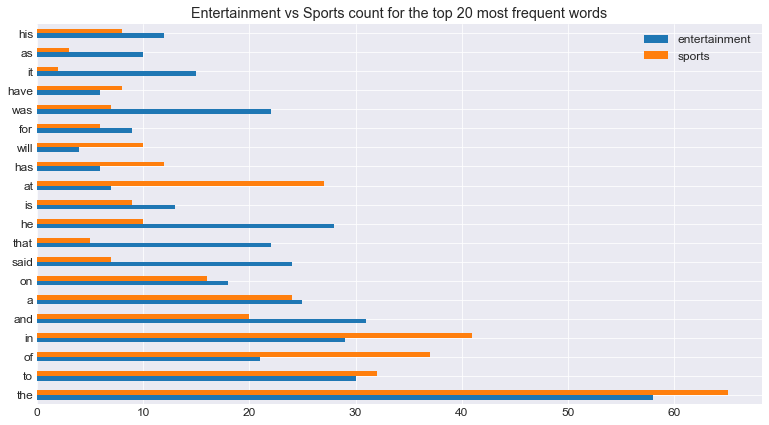

In [31]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['entertainment', 
                                                          'sports']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

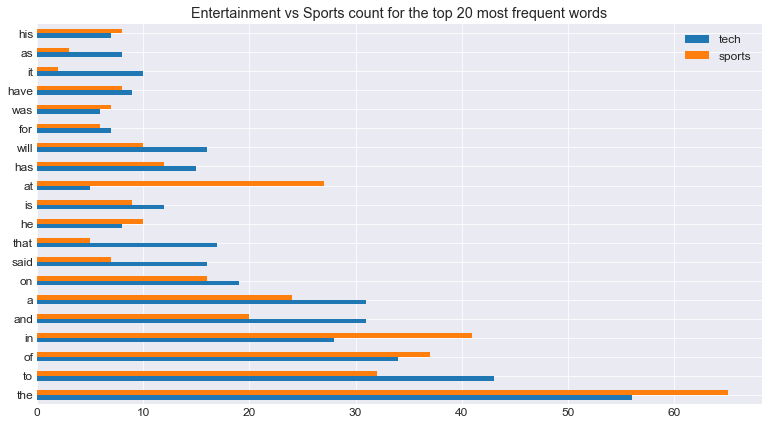

In [32]:
word_counts.sort_values('all', ascending=False).head(20)[['tech', 
                                                          'sports']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

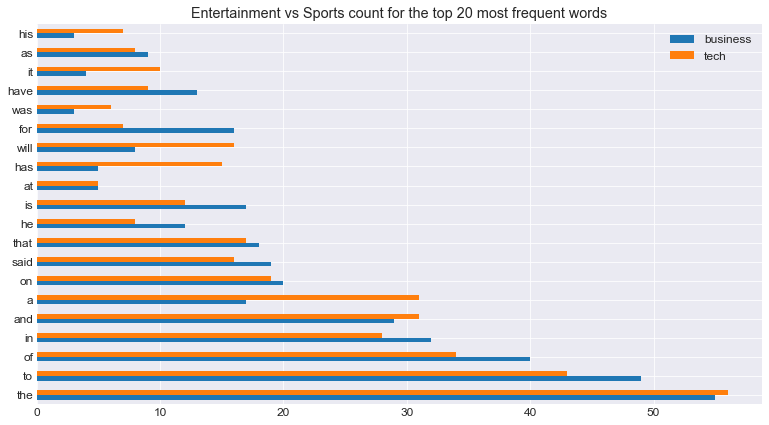

In [33]:
word_counts.sort_values('all', ascending=False).head(20)[['business', 
                                                          'tech']].plot.barh()
plt.title('Entertainment vs Sports count for the top 20 most frequent words')
None

<Figure size 1152x648 with 0 Axes>

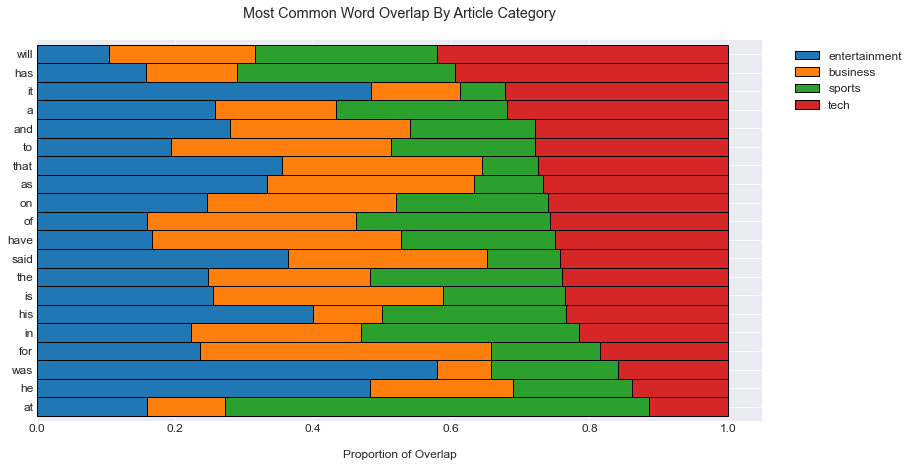

In [34]:
plt.figure(figsize=(16, 9))
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='tech')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

<Figure size 1152x648 with 0 Axes>

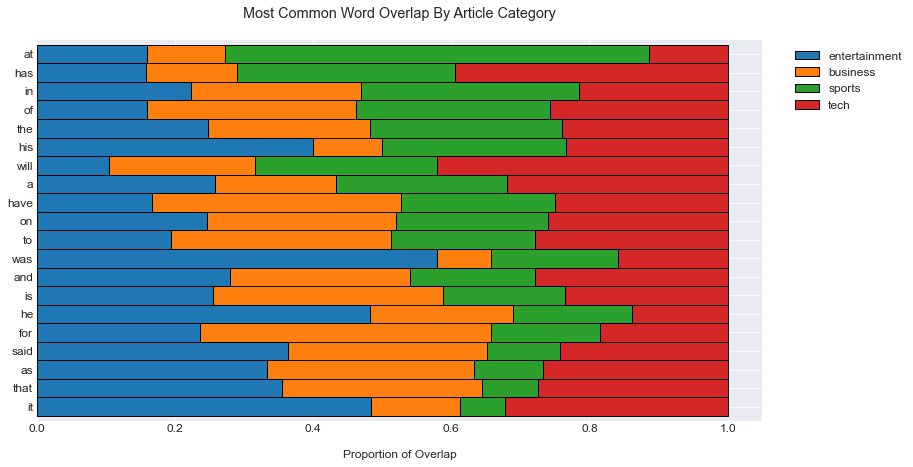

In [35]:
plt.figure(figsize=(16, 9))
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='sports')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

<Figure size 1152x648 with 0 Axes>

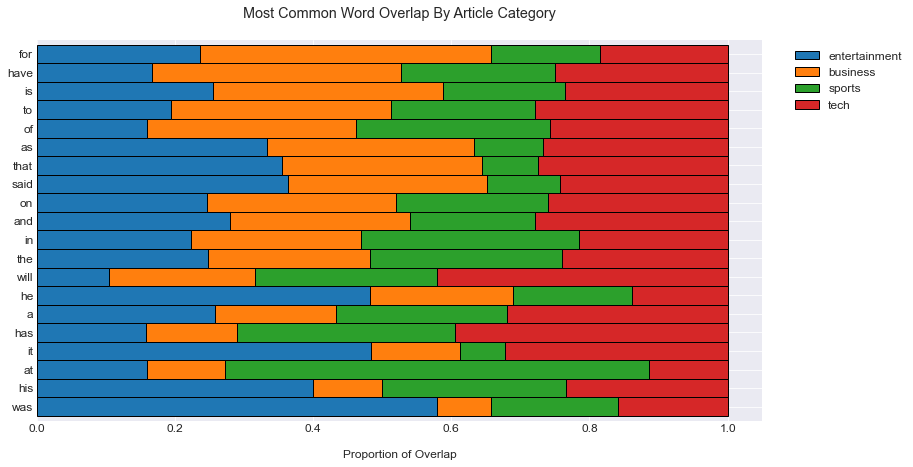

In [36]:
plt.figure(figsize=(16, 9))
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='business')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

<Figure size 1152x648 with 0 Axes>

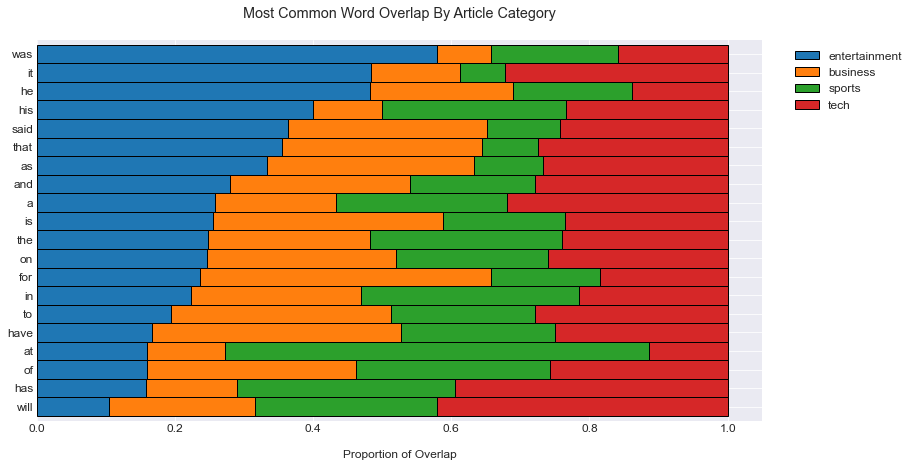

In [37]:
plt.figure(figsize=(16, 9))
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='entertainment')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.legend(bbox_to_anchor= (1.03, 1))
plt.title('Most Common Word Overlap By Article Category\n')
plt.xlabel('\nProportion of Overlap')
None

**Bigrams and Trigrams Per Category**

***Bigrams***

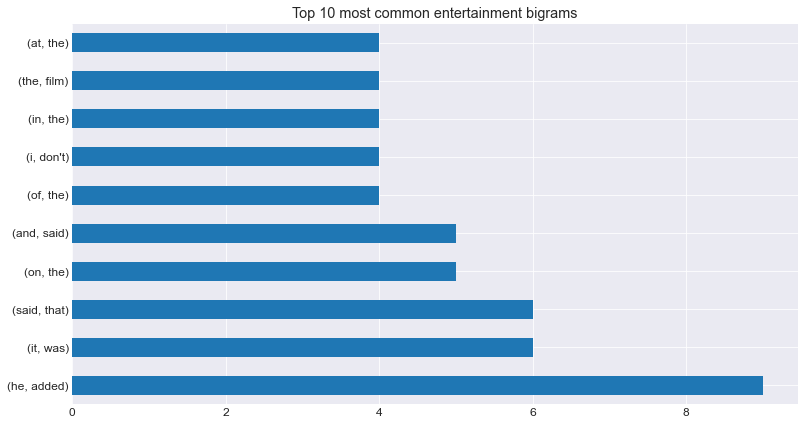

In [38]:
pd.Series(nltk.bigrams(entertain_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common entertainment bigrams')
None

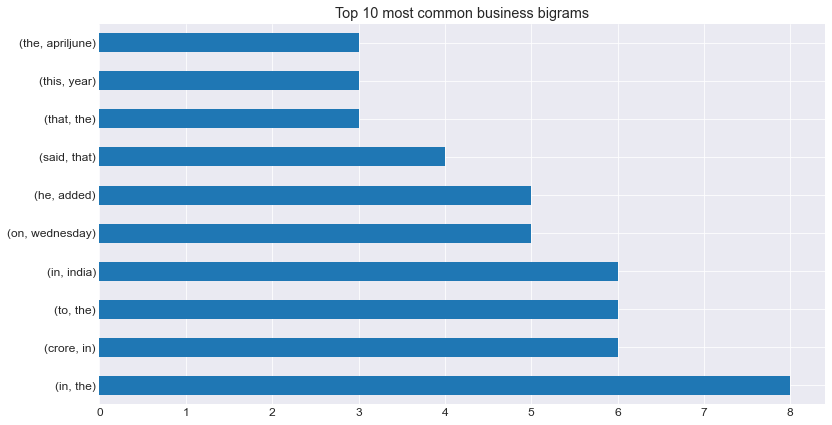

In [39]:
pd.Series(nltk.bigrams(business_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common business bigrams')
None

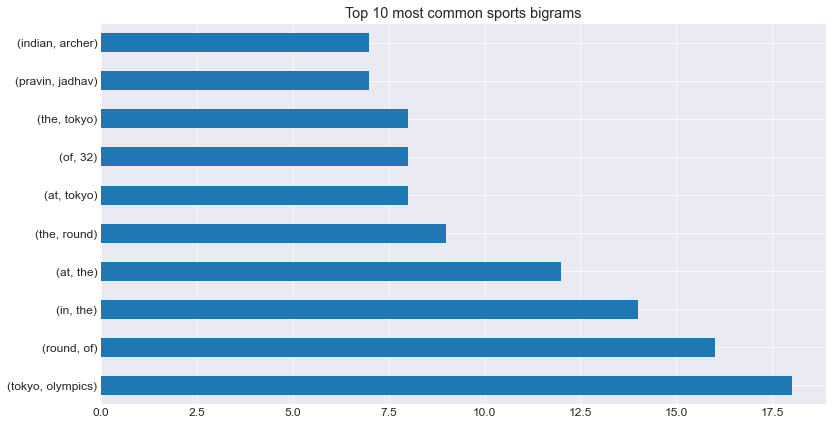

In [40]:
pd.Series(nltk.bigrams(sports_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common sports bigrams')
None

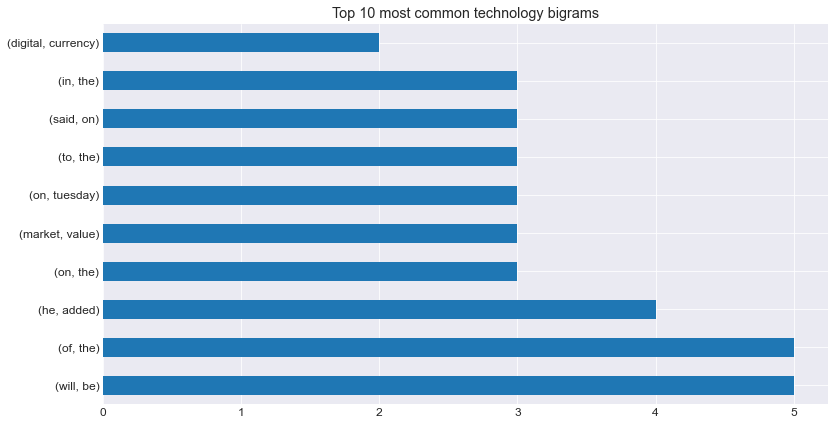

In [41]:
pd.Series(nltk.bigrams(technology_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common technology bigrams')
None

***Trigrams***

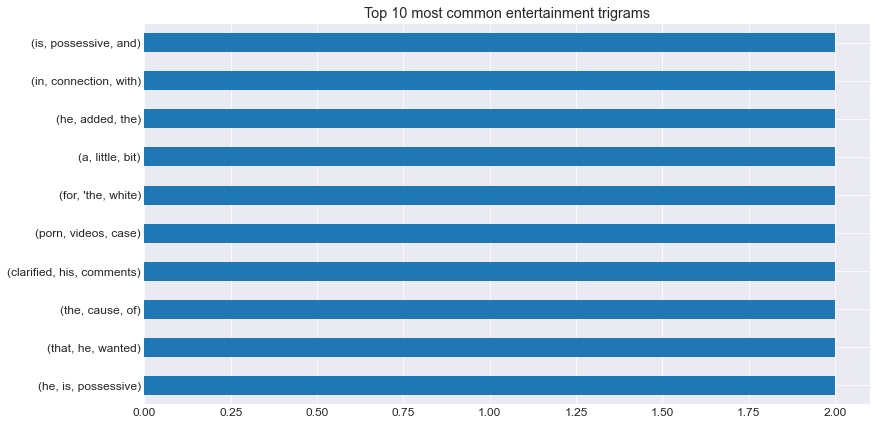

In [42]:
pd.Series(nltk.trigrams(entertain_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common entertainment trigrams')
None

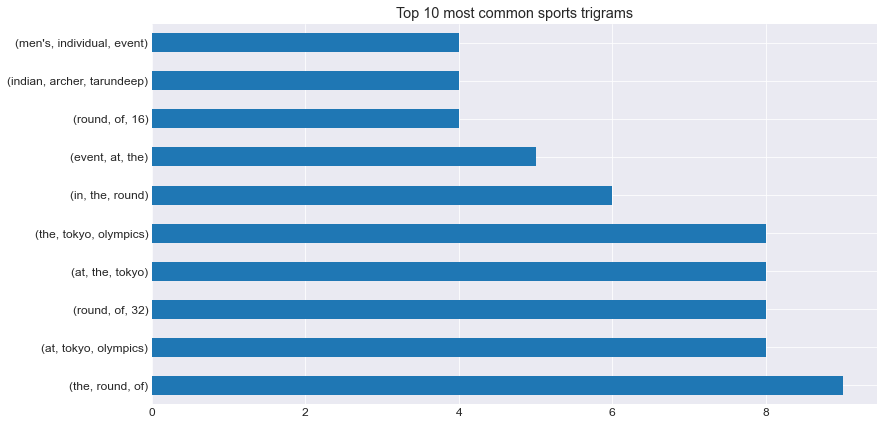

In [43]:
pd.Series(nltk.trigrams(sports_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common sports trigrams')
None

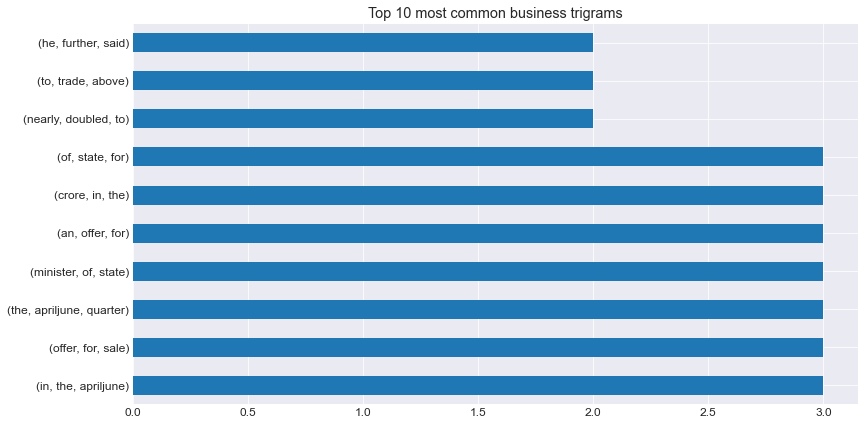

In [44]:
pd.Series(nltk.trigrams(business_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common business trigrams')
None

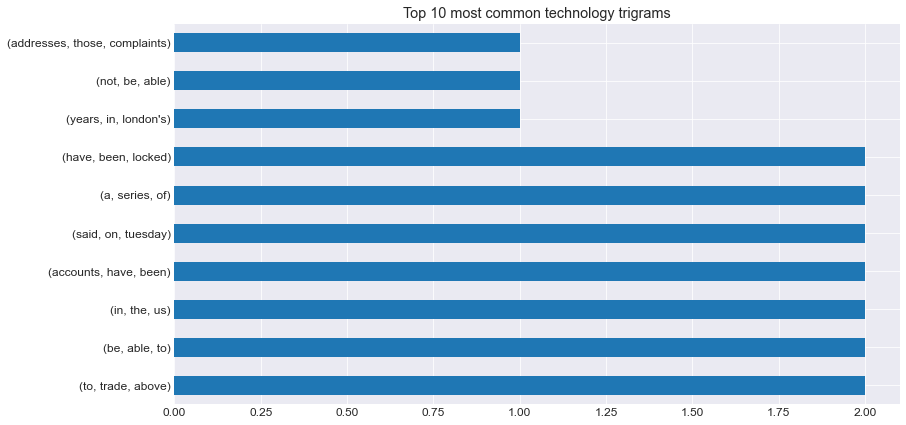

In [45]:
pd.Series(nltk.trigrams(technology_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common technology trigrams')
None

**Word Clouds**

In [46]:
## creating a series for the frequencies of the top 20 of all article categories

top_20_sports_bigrams = pd.Series(nltk.bigrams(sports_words.split()))\
.value_counts().head(20)

top_20_tech_bigrams = pd.Series(nltk.bigrams(technology_words.split()))\
.value_counts().head(20)

top_20_business_bigrams = pd.Series(nltk.bigrams(business_words.split()))\
.value_counts().head(20)

top_20_entertain_bigrams = pd.Series(nltk.bigrams(entertain_words.split()))\
.value_counts().head(20)

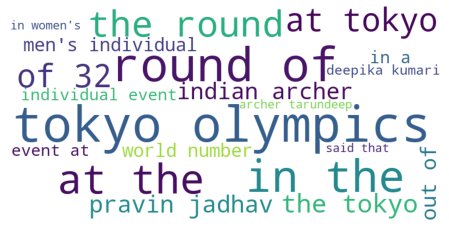

In [47]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

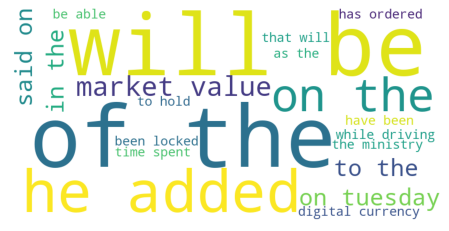

In [48]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

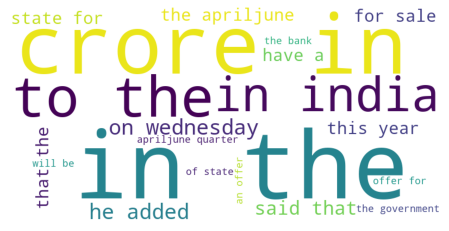

In [49]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_business_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

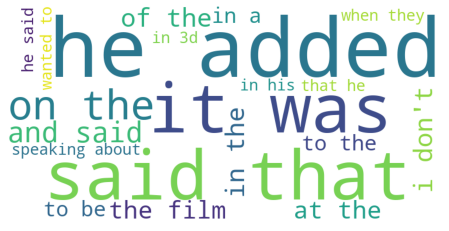

In [50]:
## using list comprehension to creat a dictionary of ham bigrams as a dictionary
## then making a wordcloud

data = {k[0] + ' ' + k[1]: v for k, v in top_20_entertain_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [51]:
## making my list of articles

article_list = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/',
                'https://codeup.com/data-science-myths/',
                'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
                'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
                'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/'
                ]

In [52]:
## getting my articles and their content

articles_df = a.process_articles(article_list)

articles_df.head()

,Title,Content
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


In [56]:
articles_df = articles_df.rename(columns={'Title': 'title', 'Content': 'content'})

In [57]:
articles_df = p.prep_content_columns(articles_df) ## using our prepare function

articles_df.head()

,title,content,clean,stemmed,lemmatized
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,the rumors are true the time has arrived codeu...,the rumor are true! the time ha arrived. codeu...,The rumor are true! The time ha arrived. Codeu...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust\ndata sci...,By dimitri antoni and maggi giust data science...,By Dimitri Antoniou and Maggie Giust Data Scie...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou\na week ago codeup launche...,"By dimitri antoni A week ago, codeup launch ou...","By Dimitri Antoniou A week ago, Codeup launche..."
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair\nthe third biannual san anton...,SA tech job fair the third bi-annu san antonio...,SA Tech Job Fair The third bi-annual San Anton...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps are closing is the model ...,competitor bootcamp are closing. Is the model ...,Competitor Bootcamps Are Closing. Is the Model...


**Exploring Bigrams and Trigrams**

In [59]:
## making a string for all of our article words

all_words = ' '.join(articles_df.clean)

In [60]:
## making a series that is the frequency of the all the words used in the articles

all_freq = pd.Series(all_words.split()).value_counts()

In [61]:
all_freq.head() ## previewing our series

the     95
and     81
to      75
data    75
a       60
dtype: int64

In [62]:
## making our word count dataframe with an all column

word_counts = pd.DataFrame(all_freq)
word_counts.columns = ['all']

word_counts.head()

,all
the,95
and,81
to,75
data,75
a,60


In [63]:
## looking at the most common words

word_counts.sort_values('all', ascending=False).head(30)

,all
the,95
and,81
to,75
data,75
a,60
of,53
in,49
is,44
for,31
your,26


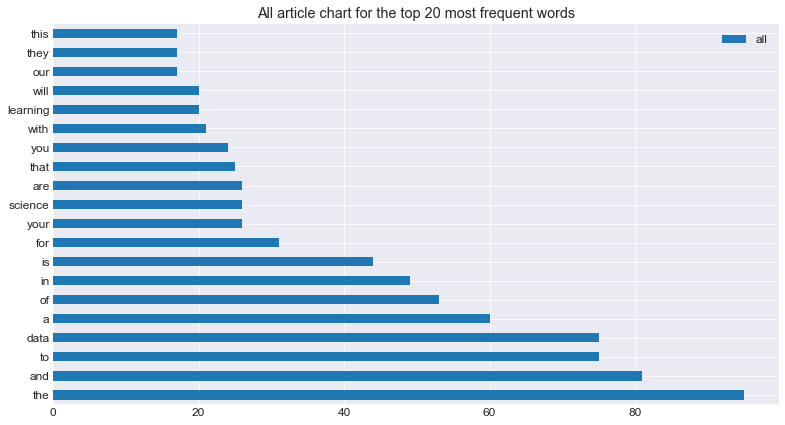

In [64]:
word_counts.sort_values('all', ascending=False).head(20).plot.barh()
plt.title('All article chart for the top 20 most frequent words')
None

**Bigrams**

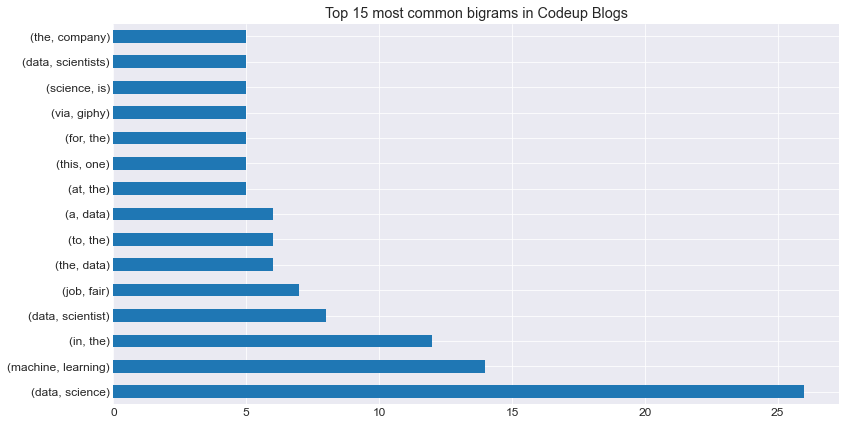

In [65]:
pd.Series(nltk.bigrams(all_words.split())).value_counts().head(15).plot.barh()
plt.title('Top 15 most common bigrams in Codeup Blogs')
None

**Trigrams**

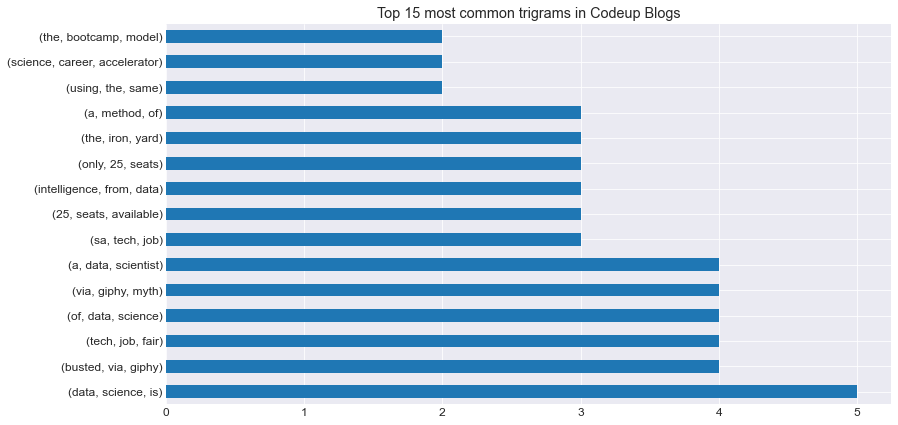

In [66]:
pd.Series(nltk.trigrams(all_words.split())).value_counts().head(15).plot.barh()
plt.title('Top 15 most common trigrams in Codeup Blogs')
None

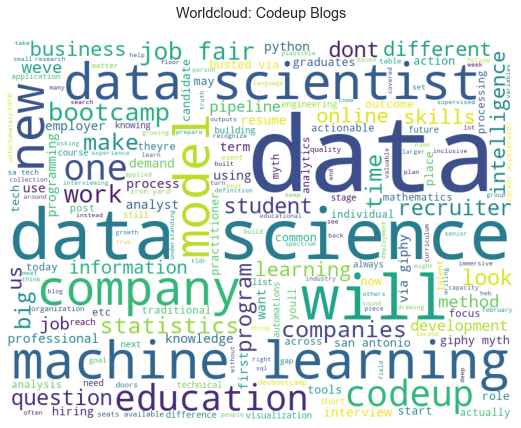

In [67]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.title('Worldcloud: Codeup Blogs\n')
None

In [68]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS

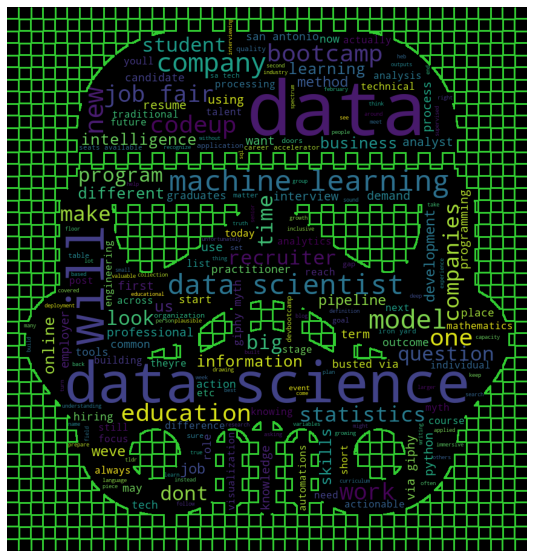

In [69]:

plt.figure(figsize = (20,10))
mask = np.array(Image.open('stormtrooper2.png'))
img = WordCloud(background_color = 'black', width = 2000, contour_width = 4,
                mask = mask, contour_color = '#32CD32')
img.generate(all_words)
plt.imshow(img)
plt.axis('off')
plt.show()